# **Using LSTM to predict stock market prices for AAPL stock.**

# **Visualization also done for coverting the data taken to candlestick view using plotly.**

## Importing Data and libraries

In [ ]:
#importing libraries
import math
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
warnings.filterwarnings('ignore')

In [ ]:
#Uploading the AAPL stock csv data downloaded from https://finance.yahoo.com/quote/AAPL/history/
from google.colab import files
files.upload()

In [ ]:
#reading the data that dates back to 5 years
df = pd.read_csv('AAPL_5Y.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-20,39.474998,39.564999,38.457500,39.017502,37.030167,211805600
1,2017-09-21,38.950001,38.950001,38.187500,38.347500,36.394276,150046800
2,2017-09-22,37.884998,38.067501,37.639999,37.972500,36.038380,186581600
3,2017-09-25,37.497501,37.957500,37.290001,37.637501,35.720444,177549200
4,2017-09-26,37.945000,38.480000,37.922501,38.285000,36.334965,146640000
...,...,...,...,...,...,...,...
1253,2022-09-13,159.899994,160.539993,153.369995,153.839996,153.839996,122656600
1254,2022-09-14,154.789993,157.100006,153.610001,155.309998,155.309998,87965400
1255,2022-09-15,154.649994,155.240005,151.380005,152.369995,152.369995,90481100
1256,2022-09-16,151.210007,151.350006,148.369995,150.699997,150.699997,162157000


## Visualizing data for stock prices from 2017 - 2022

<function matplotlib.pyplot.show(*args, **kw)>

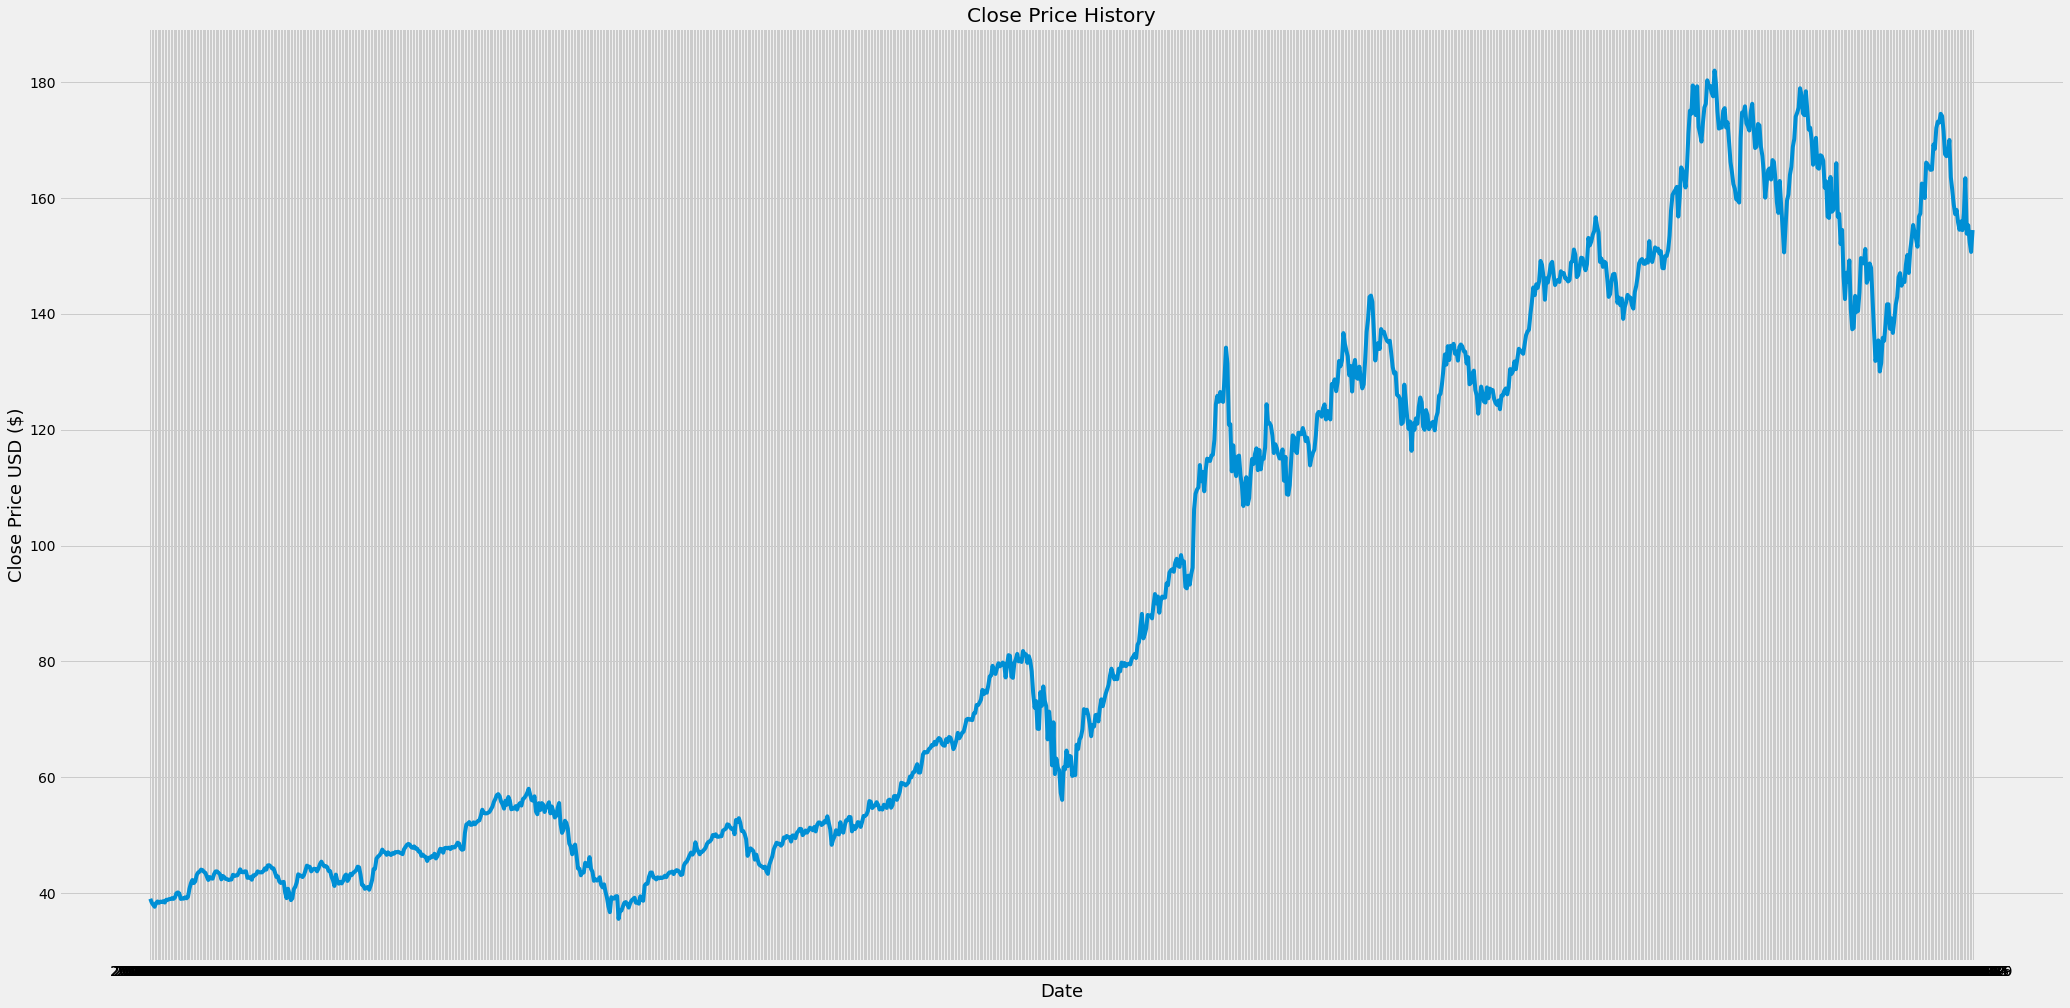

In [ ]:
#Visualizing the whole data
plt.figure(figsize=(32,16))
plt.title('Close Price History')
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

## Zooming in on just the last 20 datapoints

<function matplotlib.pyplot.show(*args, **kw)>

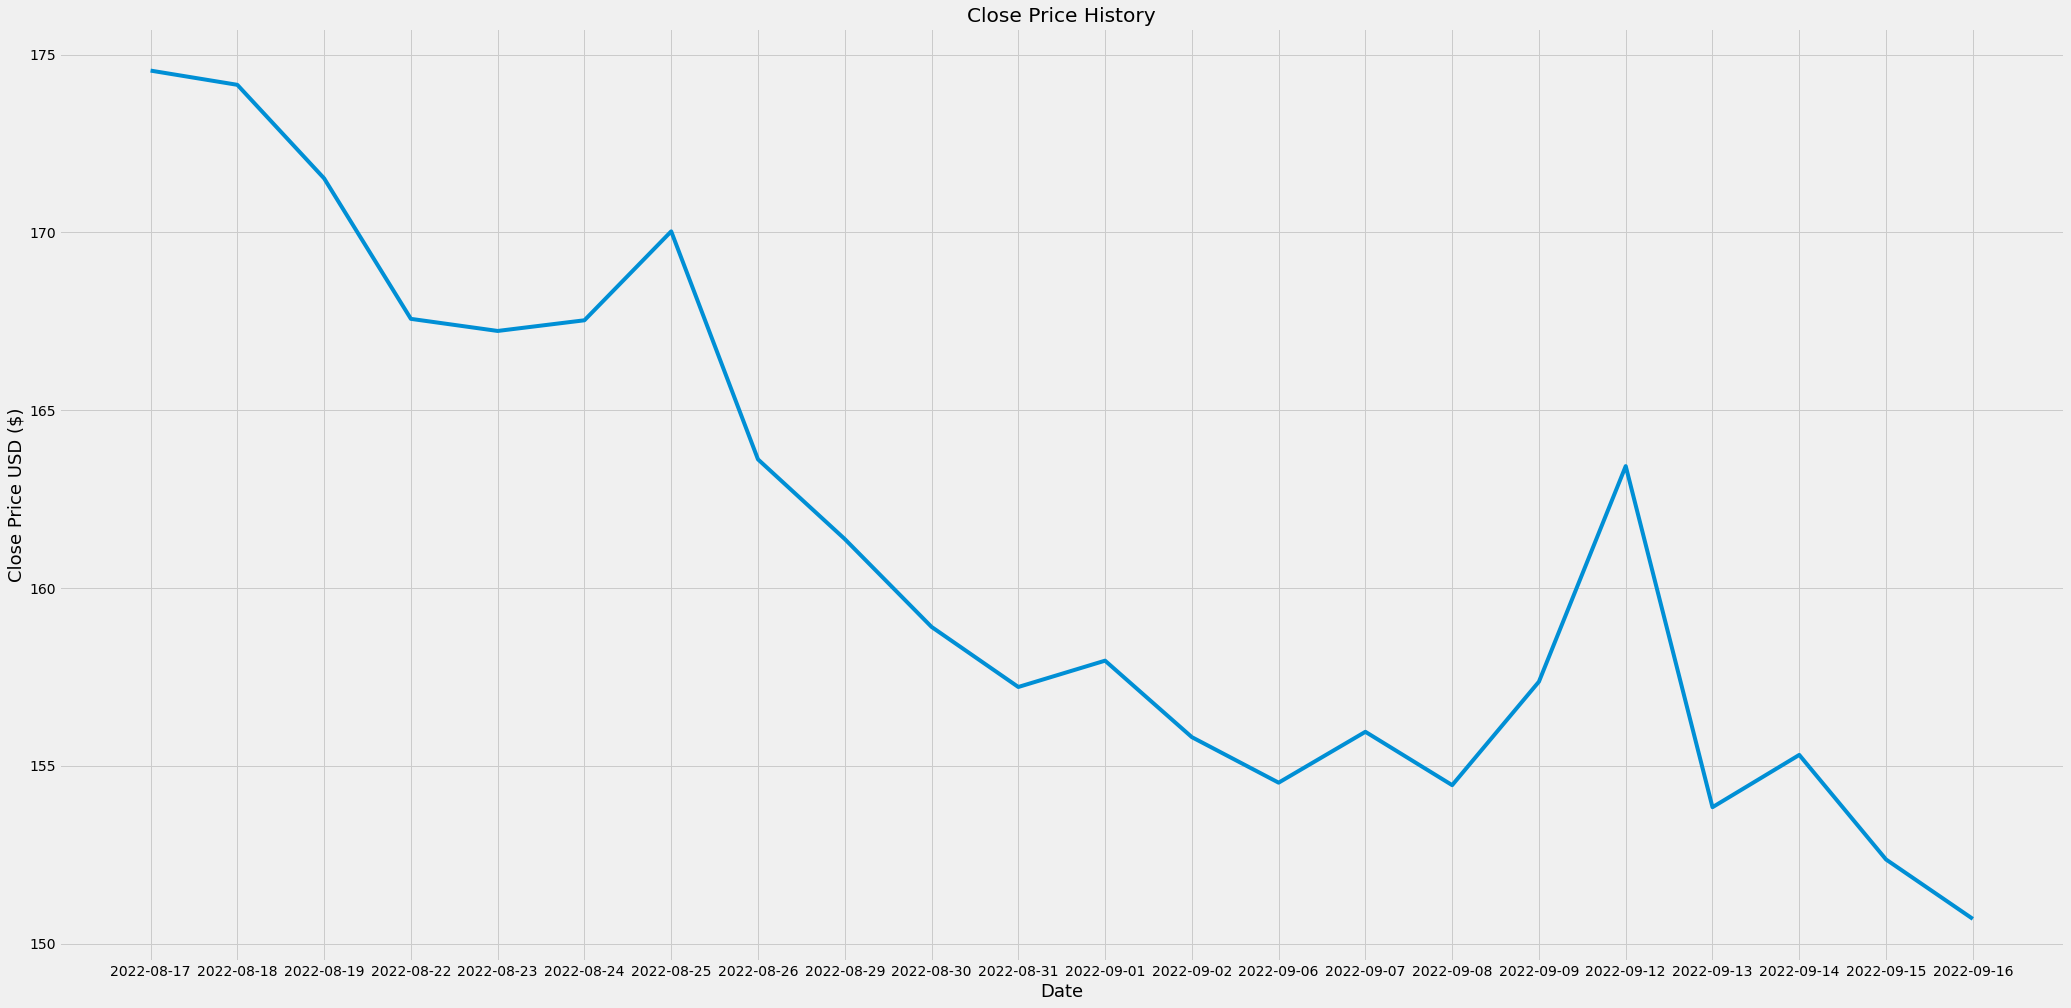

In [ ]:
#Visualizing just the past month
df_2 = df.iloc[1235:1257]
plt.figure(figsize=(32,16))
plt.title('Close Price History')
plt.plot(df_2['Date'], df_2['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

## Using plotly and datapoints from the data imported to make a candlestick graph for analysis

In [ ]:
import plotly.graph_objects as go

In [ ]:
trace1 = {
    'x': df.Date,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': 'AAPL',
    'showlegend': True
}

In [ ]:
data = [trace1]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Apple(AAPL) Moving Averages',
        'font': {
            'size': 15
        }
    }
})

In [ ]:
fig = go.Figure(data=data, layout=layout)
fig.write_html("Apple(AAPL) Moving Averages")
fig.show()

## Adding Moving averages as well to the candlestick Graph

In [ ]:
# Calculate and define moving average of 30 periods
avg_30 = df.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = df.Close.rolling(window=50, min_periods=1).mean()

trace2 = {
    'x': df.Date,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

trace3 = {
    'x': df.Date,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

In [ ]:
data = [trace1, trace2, trace3]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Apple(AAPL) Moving Averages',
        'font': {
            'size': 15
        }
    }
})

In [ ]:
fig = go.Figure(data=data, layout=layout)
fig.write_html("Apple(AAPL) Moving Averages.html")
fig.show()


## Preparing Data for the Model

In [ ]:
#Create a new df with only close values
data = df.filter(['Close'])
dataset = data.values

In [ ]:
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1007

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02369208],
       [0.01911752],
       [0.01655713],
       ...,
       [0.79762737],
       [0.78622515],
       [0.8120338 ]])

In [ ]:
#Creating Training Dataset
train_data = scaled_data[0:training_data_len, :]

In [ ]:
#splitting
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.02369208, 0.01911752, 0.01655713, 0.01426986, 0.01869079,
       0.02055132, 0.01892975, 0.02036356, 0.01983442, 0.02097805,
       0.01927113, 0.02253136, 0.02237774, 0.02329947, 0.02340188,
       0.02451139, 0.02357258, 0.02526244, 0.03019544, 0.03120252,
       0.0299906 , 0.02353844, 0.02399931, 0.02386276, 0.02545021,
       0.02427243, 0.02597935, 0.03560639, 0.04187078, 0.04583083,
       0.04216096, 0.0442434 , 0.05173679, 0.0547239 , 0.05567977,
       0.05812068, 0.05750619, 0.05544081, 0.05424596, 0.04975675,
       0.04589912, 0.04934711, 0.04772551, 0.04743534, 0.05282922,
       0.05593583, 0.05595288, 0.05445079, 0.05270975, 0.04658188,
       0.0506273 , 0.04926176, 0.04712811, 0.04685499, 0.04577962,
       0.04630879, 0.04639412, 0.05202696, 0.05037124, 0.0513442 ])]
[0.05125884992781843]



In [ ]:
#convert to np
x_train, y_train = np.array(x_train), np.array(y_train)

x_train

array([[0.02369208, 0.01911752, 0.01655713, ..., 0.05202696, 0.05037124,
        0.0513442 ],
       [0.01911752, 0.01655713, 0.01426986, ..., 0.05037124, 0.0513442 ,
        0.05125885],
       [0.01655713, 0.01426986, 0.01869079, ..., 0.0513442 , 0.05125885,
        0.05424596],
       ...,
       [0.67206622, 0.67015448, 0.6681745 , ..., 0.77837335, 0.7686097 ,
        0.77482292],
       [0.67015448, 0.6681745 , 0.66612617, ..., 0.7686097 , 0.77482292,
        0.77318424],
       [0.6681745 , 0.66612617, 0.67752839, ..., 0.77482292, 0.77318424,
        0.75454469]])

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(947, 60, 1)

## **LSTM Model**

In [ ]:
#LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

##Training

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
947/947 [==============================] - 29s 31ms/step - loss: 8.3663e-04
Epoch 2/10
947/947 [==============================] - 28s 30ms/step - loss: 7.1606e-04
Epoch 3/10
947/947 [==============================] - 29s 30ms/step - loss: 5.9442e-04
Epoch 4/10
947/947 [==============================] - 28s 30ms/step - loss: 4.5006e-04
Epoch 5/10
947/947 [==============================] - 28s 29ms/step - loss: 4.2078e-04
Epoch 6/10
947/947 [==============================] - 28s 30ms/step - loss: 3.9329e-04
Epoch 7/10
947/947 [==============================] - 28s 29ms/step - loss: 3.3597e-04
Epoch 8/10
947/947 [==============================] - 28s 29ms/step - loss: 3.3906e-04
Epoch 9/10
947/947 [==============================] - 28s 30ms/step - loss: 3.9071e-04
Epoch 10/10
947/947 [==============================] - 28s 29ms/step - loss: 5.4872e-04


## Making Test Data Set

In [ ]:
# Creating Test data Set

In [ ]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert to np
x_test = np.array(x_test)

In [ ]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

## **Results**

In [ ]:
#Get RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.788503759197585

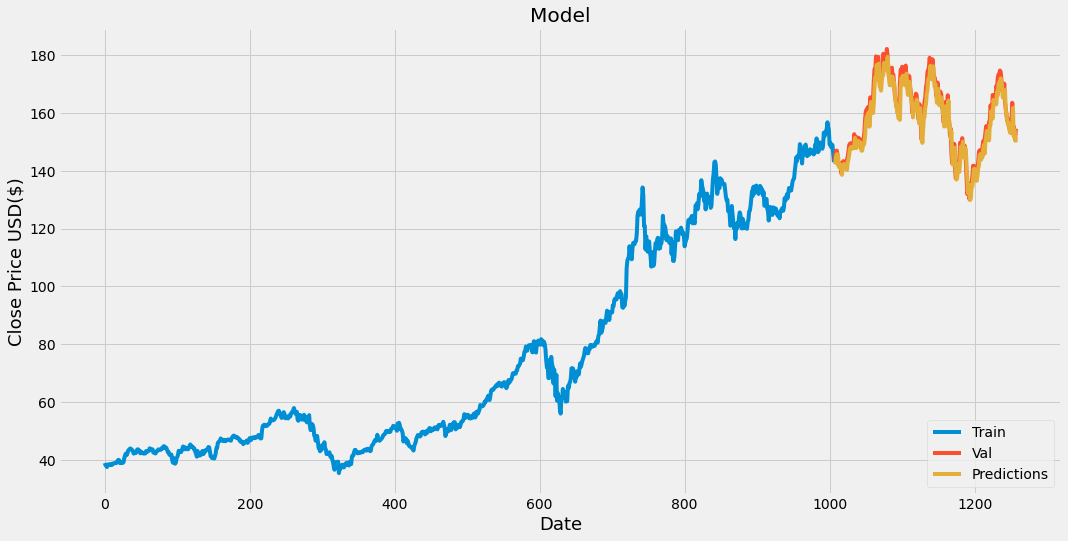

In [ ]:
#Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted price
valid

,Close,Predictions
1007,143.429993,142.156860
1008,145.850006,142.716782
1009,146.830002,144.936127
1010,146.919998,145.676346
1011,145.369995,145.667480
...,...,...
1253,153.839996,161.611160
1254,155.309998,151.789825
1255,152.369995,153.919266
1256,150.699997,151.397858
